In [1]:
import qiskit
from qiskit.quantum_info import Operator
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography
import matplotlib.pyplot as plt


In [2]:
from qiskit_aer import AerSimulator
from qiskit import Aer
from qiskit.providers.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())
backend = Aer.get_backend('aer_simulator')

In [3]:
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
num_qubits = 2
ansatz = RealAmplitudes(num_qubits, entanglement='full', reps=1, insert_barriers=False)
ansatz.decompose().draw()

┌──────────┐     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[2]) ├
     ├──────────┤┌─┴─┐├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ X ├┤ Ry(θ[3]) ├
     └──────────┘└───┘└──────────┘

In [4]:
from vqls_prototype.ml_tomography import TomographyDataset, create_dataset
params, signs = create_dataset(ansatz, 250, backend, save_to='real_amp_1_full.h5')
dataset = TomographyDataset(load='real_amp_1_full.h5')
dataset.select_feature(1)

In [5]:
from vqls_prototype.ml_tomography import TomographyModel
from vqls_prototype.ml_tomography_model import TomographyModel
model = TomographyModel(ansatz.num_parameters, 2)

In [6]:
from vqls_prototype.ml_tomography import train_model
train_model(model, dataset, batch_size=64)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/nico/miniconda3/envs/hera_cal/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
/home/nico/miniconda3/envs/hera_cal/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(

  | Name  | Type       | Par

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.


In [7]:
x,y = dataset[0]

In [8]:
import numpy as np
np.argmax(model(x).detach().numpy())

0

In [9]:
y

tensor([1., 0.])

In [10]:
import torch 
torch.zeros(2)

tensor([0., 0.])

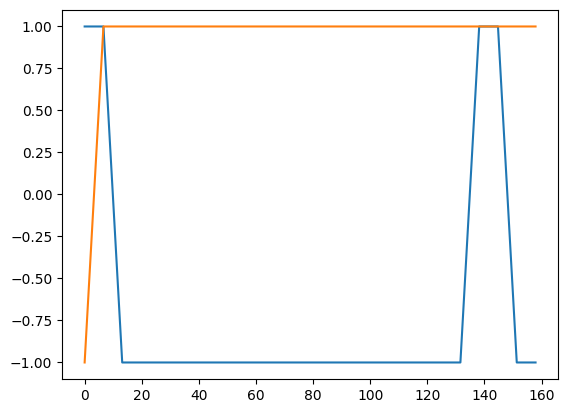

In [11]:
import numpy as np
from vqls_prototype.tomography import get_relative_amplitude_sign
params = 4*np.pi*np.random.rand(4)
pvals = 4*np.pi*np.linspace(0, 4*np.pi,25)
truth, pred = [], []
signs = [-1,1]
for p in pvals:
    params[0] = p
    truth.append(get_relative_amplitude_sign(ansatz, params, backend)[1])
    idx = np.argmax(model(torch.tensor(params).float()).detach().numpy())
    pred.append(signs[idx])
    

plt.plot(pvals, truth)
plt.plot(pvals, pred)
    

In [12]:
params.dtype

dtype('float64')